# 深度神经网络

## 1. 深度L层神经网络

之前我们已经看过了逻辑回归（没有隐藏层，只包含输入层和输出层，可以认为是单层神经网络），包含一层隐藏层的“浅层神经网络”（两层神经网络，计算层数时，不包含输入层）。而所谓深度神经网络，就是增加隐藏层的数量。

这些年AI/机器学习社区的实践发现，诸如图像、自然语言在内的一些问题，需要深度神经网络才可能学到相应的模式，而浅层的模型完全无法做到。但同时，我们无法提前预知，处理这些问题需要多深的神经网络。因为深度神经网络的层数、每层神经元的数量都可以看做是超参，需要通过交叉验证之类的方法来确定。

## 2. 深度神经网络中的前向传播

$$
\begin{split}
for \, l &= 1, 2, ..., L: \\
Z^{[l]} &= W^{[l]}A^{[l-1]} + b^{[l]} \\
A^{[l]} &= g^{[l]}(Z^{[l]})
\end{split}
$$

## 3. 确定深度神经网络中各矩阵的维度

$$
\begin{split}
W^{[l]} &: (n^{[l]}, n^{[l-1]}) \\
b^{[l]} &: (n^{[l]}, 1) \\
dW^{[l]} &: (n^{[l]}, n^{[l-1]}) \\
db^{[l]} &: (n^{[l]}, 1) \\
Z^{[l]},A^{[l]} &: (n^{[l]}, m) \\
dZ^{[l]},dA^{[l]} &: (n^{[l]}, m) \\
\end{split}
$$

## 4. 为什么要用深度神经网路

深度神经网络：逐层增加复杂度。

- 人脸识别问题：检测边界 -> 检测器官 -> 检测面部；

- 语音识别问题：底层的特征（比如音调上升或下降，白噪声等） -> 声音的基本单元（音位Phoneme） -> 单词 -> 句子；

神经科学认为，人类大脑的工作流程也是从简单的检测功能构建起来，进而检测更复杂的内容。

![Intuition about deep representation](img/Intuition about deep representation.png)

电路理论和深度学习：要用浅层的神经网络实现深度神经网络同样的功能，需要浅层神经网络中具备相比深度神经网络指数级别多的神经元。

- 一个例子：多个输入变量的XOR，深度神经网络需要 $O(logn)$ 级别的神经元；而双层（单隐藏层）神经网络需要 $O(2^n)$ 级别的神经元

![Circuit theory and deep learning](img/Circuit theory and deep learning.png)

## 5. 深度神经网络的组成

前向传播反向传播，计算前向传播的过程中，缓存相应的变量，用于后续计算反向传播。

![Forward and backward functions](img/Forward and backward functions.png)

## 6. 前向传播和反向传播

反向传播过程：
$$
\begin{split}
for \, l &= L, L-1, ..., 1: \\
dZ^{[l]} &= dA^{[l]} * g^{[l]\prime}(Z^{[l]}) \\
dW^{[l]} &= \frac{1}{m}dZ^{[l]} \cdot A^{[l-1]T} \\
db^{[l]} &= \frac{1}{m}np.sum(dZ{[l]}, axis=1, keepdims=True) \\
dA^{[l-1]} &= W^{[l]T} \cdot dZ^{[l]}
\end{split}
$$

![Summary](img/Summary.png)

## 7. 参数和超参

这部分和传统机器学习差别不大，唯一的区别可能是深度学习的超参相对更多。超参需要通过交叉验证来调。

![What are hyperparameters](img/What are hyperparameters.png)

应用深度学习是一个经验性的过程，意思是说，调节超参的过程，存在很多重复尝试的阶段。暂时也没有什么好的方法，预先知道超参的大致范围。
![Applied deep learning is a very empirical process](img/Applied deep learning is a very empirical process.png)

## 8. 人工神经网络和大脑的关系

人工神经网络的灵感来自于大脑基于无数神经元的结构。但事实上，神经科学至今也还不能很好地解释大脑的运作原理，大脑学习的过程也可能会和人工神经网络的激活、反向传播截然不同。而深度学习发展到今天，和当初来自神经元的灵感也已经有很大不同了，二者可能并不存在太多实际的关联。

把人工神经网络，尤其是深度学习，看做是一种拟合X->Y关系的高效机器学习算法就好。这可能是目前最合适的定位。

![What does this have to do with the brain](img/What does this have to do with the brain.png)

## 9. Show Me The Code

之前我们构建了2层的神经网络，接下来我们将构建可以包含任意多层的深度神经网络。

**通过这个编程练习，可以学到：**
- 使用诸如ReLU的非线性神经元来提升模型
- 构建更深层的神经网络（超过一个隐藏层）
- 实现一个易用的神经网络类

**标记**:
- 上标 $[l]$ 表示第 $l^{th}$ 层相关的数据 
    - 举例：$a^{[L]}$ 是第 $L^{th}$ 层的激活值. $W^{[L]}$ 和 $b^{[L]}$ 是第 $L^{th}$ 层的参数。
- 上标 $(i)$ 表示第 $i^{th}$ 个样本相关的数据
    - 举例：$x^{(i)}$ 是第 $i^{th}$ 个训练样本。
- 下标 $i$ 表示向量中的第 $i^{th}$ 个值。
    - 举例：$a^{[l]}_i$ 表示第 $l^{th}$ 层的第 $i^{th}$ 个激活值。

### 9.1 三方包

首先，运行下面的代码块，来引入在这个编程练习中所需要的包。 
- [numpy](www.numpy.org) 是Python生态圈中进行科学计算的基础包。
- [matplotlib](http://matplotlib.org) 是Python生态圈中著名的绘图包。
- dnn_utils 提供了一些辅助函数
- testCases 提供了一些测试用例，用来测试所写函数的准确性
- np.random.seed(1) 用来保证随机函数调用结果的一致性。

In [1]:
import numpy as np
import h5py
import matplotlib.pyplot as plt
from testCases_v3 import *
from dnn_utils_v2 import sigmoid, sigmoid_backward, relu, relu_backward

%matplotlib inline
plt.rcParams['figure.figsize'] = (5.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2

np.random.seed(1)

### 9.2 问题总览

为了自行构建神经网络，需要首先实现一些“辅助函数”。这些辅助函数后面会用于构建一个两层的神经网络和一个L层的神经网络，主要包括如下：

- 为两层神经网络和 $L$ 层神经网络初始化参数
- 实现前向传播（图中紫色的部分）
     - 完成前向传播步骤中线性组合的部分（输出 $Z^{[l]}$）
     - 使用已经给定了激活函数（relu/sigmoid）
     - 将上面两步结合为一个前向传播函数（LINEAR->ACTIVATION）
     - 计算 [LINEAR->RELU] 前向传播 L-1 次（从第1层到第L-1层），最后再计算一次 [LINEAR->SIGMOID]（第L层）。合并这两步，得到 L_model_forward 函数。
- 计算损失
- 实现反向传播（图中红色的部分）
     - 完成反向传播步骤中线性的部分
     - 使用已经给定了的激活函数的梯度（relu_backward/sigmoid_backward）
     - 将上面两步结合为一个反向传播函数（LINEAR->ACTIVATION）
     - 计算 [LINEAR->RELU] 反向传播 L-1 次，最后再计算一次 [LINEAR->SIGMOID]。合并这两步，得到 L_model_backward 函数。
- 更新参数

<img src="img/final outline.png" style="width:800px;height:500px;">
<caption><center> **图 1**</center></caption><br>

**注意** 对于每个前向传播函数，都有对应的反向传播函数。因此每一步前向传播模块都要保存一些值到缓存中。缓存中的值可以用于反向传播模块中计算梯度。

### 9.3 初始化

我们需要写两个辅助函数用于模型参数的初始化，分别对应两层神经网络和 $L$ 层神经网络。

#### 9.3.1 两层神经网络

**练习**: 创建一个两层神经网络并初始化参数。

**指令**:
- 模型的结构为：*LINEAR -> RELU -> LINEAR -> SIGMOID*
- 权重矩阵需要随机初始化。用正确的矩阵维度调用 `np.random.randn(shape)*0.01`
- 截距向量使用0值初始化。调用 `np.zeros(shape)`

In [2]:
# GRADED FUNCTION: initialize_parameters

def initialize_parameters(n_x, n_h, n_y):
    """
    Argument:
    n_x -- size of the input layer
    n_h -- size of the hidden layer
    n_y -- size of the output layer
    
    Returns:
    parameters -- python dictionary containing your parameters:
                    W1 -- weight matrix of shape (n_h, n_x)
                    b1 -- bias vector of shape (n_h, 1)
                    W2 -- weight matrix of shape (n_y, n_h)
                    b2 -- bias vector of shape (n_y, 1)
    """
    
    np.random.seed(1)
    
    ### START CODE HERE ### (≈ 4 lines of code)
    W1 = np.random.randn(n_h, n_x) * 0.01
    b1 = np.zeros((n_h, 1))
    W2 = np.random.randn(n_y, n_h) * 0.01
    b2 = np.zeros((n_y, 1))
    ### END CODE HERE ###
    
    assert(W1.shape == (n_h, n_x))
    assert(b1.shape == (n_h, 1))
    assert(W2.shape == (n_y, n_h))
    assert(b2.shape == (n_y, 1))
    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters    

In [3]:
parameters = initialize_parameters(3,2,1)
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

W1 = [[ 0.01624345 -0.00611756 -0.00528172]
 [-0.01072969  0.00865408 -0.02301539]]
b1 = [[ 0.]
 [ 0.]]
W2 = [[ 0.01744812 -0.00761207]]
b2 = [[ 0.]]


**预期输出**:
       
<table style="width:80%">
  <tr>
    <td> **W1** </td>
    <td> [[ 0.01624345 -0.00611756 -0.00528172]
 [-0.01072969  0.00865408 -0.02301539]] </td> 
  </tr>

  <tr>
    <td> **b1**</td>
    <td>[[ 0.]
 [ 0.]]</td> 
  </tr>
  
  <tr>
    <td>**W2**</td>
    <td> [[ 0.01744812 -0.00761207]]</td>
  </tr>
  
  <tr>
    <td> **b2** </td>
    <td> [[ 0.]] </td> 
  </tr>
  
</table>

#### 9.3.2 L层神经网络

L层深度神经网络的初始化会稍微复杂一些，因为我们现在有更多的权重矩阵和截距向量。在实现 `initialize_parameters_deep` 时，你需要保证每一层相关参数的维度正确。回忆一下， $n^{[l]}$ 表示 $l$ 层的神经元数量。因此假设输入 $X$ 是 $(12288, 209)$ 维度的矩阵时（包含 $m=209$ 个训练样本），那么：

<table style="width:100%">


    <tr>
        <td>  </td> 
        <td> **Shape of W** </td> 
        <td> **Shape of b**  </td> 
        <td> **Activation** </td>
        <td> **Shape of Activation** </td> 
    <tr>
    
    <tr>
        <td> **Layer 1** </td> 
        <td> $(n^{[1]},12288)$ </td> 
        <td> $(n^{[1]},1)$ </td> 
        <td> $Z^{[1]} = W^{[1]}  X + b^{[1]} $ </td> 
        
        <td> $(n^{[1]},209)$ </td> 
    <tr>
    
    <tr>
        <td> **Layer 2** </td> 
        <td> $(n^{[2]}, n^{[1]})$  </td> 
        <td> $(n^{[2]},1)$ </td> 
        <td>$Z^{[2]} = W^{[2]} A^{[1]} + b^{[2]}$ </td> 
        <td> $(n^{[2]}, 209)$ </td> 
    <tr>
   
       <tr>
        <td> $\vdots$ </td> 
        <td> $\vdots$  </td> 
        <td> $\vdots$  </td> 
        <td> $\vdots$</td> 
        <td> $\vdots$  </td> 
    <tr>
    
   <tr>
        <td> **Layer L-1** </td> 
        <td> $(n^{[L-1]}, n^{[L-2]})$ </td> 
        <td> $(n^{[L-1]}, 1)$  </td> 
        <td>$Z^{[L-1]} =  W^{[L-1]} A^{[L-2]} + b^{[L-1]}$ </td> 
        <td> $(n^{[L-1]}, 209)$ </td> 
    <tr>
    
    
   <tr>
        <td> **Layer L** </td> 
        <td> $(n^{[L]}, n^{[L-1]})$ </td> 
        <td> $(n^{[L]}, 1)$ </td>
        <td> $Z^{[L]} =  W^{[L]} A^{[L-1]} + b^{[L]}$</td>
        <td> $(n^{[L]}, 209)$  </td> 
    <tr>

</table>

回顾一下，当我们使用numpy计算 $W X + b$ 时，它会使用广播机制。例如，如果： 

$$ W = \begin{bmatrix}
    j  & k  & l\\
    m  & n & o \\
    p  & q & r 
\end{bmatrix}\;\;\; X = \begin{bmatrix}
    a  & b  & c\\
    d  & e & f \\
    g  & h & i 
\end{bmatrix} \;\;\; b =\begin{bmatrix}
    s  \\
    t  \\
    u
\end{bmatrix}\tag{2}$$

那么 $WX + b$ 的结果是：

$$ WX + b = \begin{bmatrix}
    (ja + kd + lg) + s  & (jb + ke + lh) + s  & (jc + kf + li)+ s\\
    (ma + nd + og) + t & (mb + ne + oh) + t & (mc + nf + oi) + t\\
    (pa + qd + rg) + u & (pb + qe + rh) + u & (pc + qf + ri)+ u
\end{bmatrix}\tag{3}  $$

**练习**: 实现L层神经网络的参数初始化

**指令**：
- 模型的结构为 *[LINEAR -> RELU] $ \times$ (L-1) -> LINEAR -> SIGMOID*。也就是说，前 $L-1$ 层使用ReLU激活函数，而输出层使用sigmoid激活函数。
- 权重矩阵使用随机初始化。调用 `np.random.rand(shape) * 0.01`。
- 截距向量使用0值初始化。调用 `np.zeros(shape)`。
- 我们会在变量 `layer_dims` 中保存 $n^{[l]}$，也即不同层神经元的数量。
- 下面是 $L=1$ 时的实现。可以根据这个例子推广到 $L$ 为任意正正数的情况
```python
    if L == 1:
        parameters["W" + str(L)] = np.random.randn(layer_dims[1], layer_dims[0]) * 0.01
        parameters["b" + str(L)] = np.zeros((layer_dims[1], 1))
```

In [4]:
# GRADED FUNCTION: initialize_parameters_deep

def initialize_parameters_deep(layer_dims):
    """
    Arguments:
    layer_dims -- python array (list) containing the dimensions of each layer in our network
    
    Returns:
    parameters -- python dictionary containing your parameters "W1", "b1", ..., "WL", "bL":
                    Wl -- weight matrix of shape (layer_dims[l], layer_dims[l-1])
                    bl -- bias vector of shape (layer_dims[l], 1)
    """
    
    np.random.seed(3)
    parameters = {}
    L = len(layer_dims)            # number of layers in the network

    for l in range(1, L):
        ### START CODE HERE ### (≈ 2 lines of code)
        parameters['W' + str(l)] = np.random.randn(layer_dims[l], layer_dims[l-1]) * 0.01
        parameters['b' + str(l)] = np.zeros((layer_dims[l], 1))
        ### END CODE HERE ###
        
        assert(parameters['W' + str(l)].shape == (layer_dims[l], layer_dims[l-1]))
        assert(parameters['b' + str(l)].shape == (layer_dims[l], 1))

        
    return parameters

In [5]:
parameters = initialize_parameters_deep([5,4,3])
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

W1 = [[ 0.01788628  0.0043651   0.00096497 -0.01863493 -0.00277388]
 [-0.00354759 -0.00082741 -0.00627001 -0.00043818 -0.00477218]
 [-0.01313865  0.00884622  0.00881318  0.01709573  0.00050034]
 [-0.00404677 -0.0054536  -0.01546477  0.00982367 -0.01101068]]
b1 = [[ 0.]
 [ 0.]
 [ 0.]
 [ 0.]]
W2 = [[-0.01185047 -0.0020565   0.01486148  0.00236716]
 [-0.01023785 -0.00712993  0.00625245 -0.00160513]
 [-0.00768836 -0.00230031  0.00745056  0.01976111]]
b2 = [[ 0.]
 [ 0.]
 [ 0.]]


**预期输出**:
       
<table style="width:80%">
  <tr>
    <td> **W1** </td>
    <td>[[ 0.01788628  0.0043651   0.00096497 -0.01863493 -0.00277388]
 [-0.00354759 -0.00082741 -0.00627001 -0.00043818 -0.00477218]
 [-0.01313865  0.00884622  0.00881318  0.01709573  0.00050034]
 [-0.00404677 -0.0054536  -0.01546477  0.00982367 -0.01101068]]</td> 
  </tr>
  
  <tr>
    <td>**b1** </td>
    <td>[[ 0.]
 [ 0.]
 [ 0.]
 [ 0.]]</td> 
  </tr>
  
  <tr>
    <td>**W2** </td>
    <td>[[-0.01185047 -0.0020565   0.01486148  0.00236716]
 [-0.01023785 -0.00712993  0.00625245 -0.00160513]
 [-0.00768836 -0.00230031  0.00745056  0.01976111]]</td> 
  </tr>
  
  <tr>
    <td>**b2** </td>
    <td>[[ 0.]
 [ 0.]
 [ 0.]]</td> 
  </tr>
  
</table>

### 9.4 前向传播模块

#### 9.4.1 线性前向传播 
有了初始化的参数之后，就可以开始开发前向传播的模块。首先我们需要按顺序实现一些基本的函数：

- LINEAR
- LINEAR -> ACTIVATION 其中激活函数可以是 ReLU 或 Sigmoid. 
- [LINEAR -> RELU] $\times$ (L-1) -> LINEAR -> SIGMOID 整个前向传播过程

前向传播模块的计算公式是：

$$Z^{[l]} = W^{[l]}A^{[l-1]} +b^{[l]}\tag{4}$$

其中 $A^{[0]} = X$. 

**练习**: 构建前向传播的线性部分

In [6]:
# GRADED FUNCTION: linear_forward

def linear_forward(A, W, b):
    """
    Implement the linear part of a layer's forward propagation.

    Arguments:
    A -- activations from previous layer (or input data): (size of previous layer, number of examples)
    W -- weights matrix: numpy array of shape (size of current layer, size of previous layer)
    b -- bias vector, numpy array of shape (size of the current layer, 1)

    Returns:
    Z -- the input of the activation function, also called pre-activation parameter 
    cache -- a python dictionary containing "A", "W" and "b" ; stored for computing the backward pass efficiently
    """
    
    ### START CODE HERE ### (≈ 1 line of code)
    Z = np.dot(W, A) + b
    ### END CODE HERE ###
    
    assert(Z.shape == (W.shape[0], A.shape[1]))
    cache = (A, W, b)
    
    return Z, cache

In [7]:
A, W, b = linear_forward_test_case()

Z, linear_cache = linear_forward(A, W, b)
print("Z = " + str(Z))

Z = [[ 3.26295337 -1.23429987]]


**预期输出**:

<table style="width:35%">
  
  <tr>
    <td> **Z** </td>
    <td> [[ 3.26295337 -1.23429987]] </td> 
  </tr>
  
</table>

#### 9.4.2 线性-激活 前向传播

在这个notebook中，我们将会使用两种激活函数：

- **Sigmoid**: $\sigma(Z) = \sigma(W A + b) = \frac{1}{ 1 + e^{-(W A + b)}}$。我们已经引入了 `sigmoid` 函数。这个函数返回 **两个** 变量：激活值 "`a`" 和缓存 "`cache`"，缓存中包含了 "`Z`" (在反向传播中会用到)。按照下面的方法调用函数即可
``` python
A, activation_cache = sigmoid(Z)
```

- **ReLU**: ReLU的数学公式是 $A = RELU(Z) = max(0, Z)$。同样的， `relu` 函数已经在上面引入了，这个函数也返回 **两个** 变量：激活值 "`a`" 和缓存 "`cache`"，缓存中包含了 "`Z`" (在反向传播中会用到)。按照下面的方法调用函数即可
``` python
A, activation_cache = relu(Z)
```

为了使用方便，我们会将线性组合函数和激活函数组合成一个线性-激活函数。因此，下面的实现会首先进行线性组合，接着进行激活。

**练习**：实现 *LINEAR->ACTIVATION* 的前向传播过程。数学公式为：A^{[l]} = g(Z^{[l]}) = g(W^{[l]}A^{[l-1]} +b^{[l]})$ 其中激活函数 "g" 可以是 sigmoid() 或 relu()。调用 linear_forward() 以及相应的激活函数。

In [8]:
# GRADED FUNCTION: linear_activation_forward

def linear_activation_forward(A_prev, W, b, activation):
    """
    Implement the forward propagation for the LINEAR->ACTIVATION layer

    Arguments:
    A_prev -- activations from previous layer (or input data): (size of previous layer, number of examples)
    W -- weights matrix: numpy array of shape (size of current layer, size of previous layer)
    b -- bias vector, numpy array of shape (size of the current layer, 1)
    activation -- the activation to be used in this layer, stored as a text string: "sigmoid" or "relu"

    Returns:
    A -- the output of the activation function, also called the post-activation value 
    cache -- a python dictionary containing "linear_cache" and "activation_cache";
             stored for computing the backward pass efficiently
    """
    
    if activation == "sigmoid":
        # Inputs: "A_prev, W, b". Outputs: "A, activation_cache".
        ### START CODE HERE ### (≈ 2 lines of code)
        Z, linear_cache = linear_forward(A_prev, W, b)
        A, activation_cache = sigmoid(Z)
        ### END CODE HERE ###
    
    elif activation == "relu":
        # Inputs: "A_prev, W, b". Outputs: "A, activation_cache".
        ### START CODE HERE ### (≈ 2 lines of code)
        Z, linear_cache = linear_forward(A_prev, W, b)
        A, activation_cache = relu(Z)
        ### END CODE HERE ###
    
    assert (A.shape == (W.shape[0], A_prev.shape[1]))
    cache = (linear_cache, activation_cache)

    return A, cache

In [9]:
A_prev, W, b = linear_activation_forward_test_case()

A, linear_activation_cache = linear_activation_forward(A_prev, W, b, activation = "sigmoid")
print("With sigmoid: A = " + str(A))

A, linear_activation_cache = linear_activation_forward(A_prev, W, b, activation = "relu")
print("With ReLU: A = " + str(A))

With sigmoid: A = [[ 0.96890023  0.11013289]]
With ReLU: A = [[ 3.43896131  0.        ]]


**预期输出**:
       
<table style="width:35%">
  <tr>
    <td> **With sigmoid: A ** </td>
    <td > [[ 0.96890023  0.11013289]]</td> 
  </tr>
  <tr>
    <td> **With ReLU: A ** </td>
    <td > [[ 3.43896131  0.        ]]</td> 
  </tr>
</table>


**注意**：在深度学习中，"[LINEAR->ACTIVATION]" 的计算过程是神经网络中的一层，而不是两层。

#### 9.4.3 L层的模型

为了L层神经网络模型的使用便利，我们需要一个函数重复上面的步骤（使用ReLU的 `linear_activation_forward`） $L-1$ 次，之后再计算一次使用SIGMOID的 `linear_activation_forward`。

<img src="img/model_architecture_kiank.png" style="width:600px;height:300px;">
<caption><center> **图 2** : *[LINEAR -> RELU] $\times$ (L-1) -> LINEAR -> SIGMOID* model</center></caption><br>

**练习**：实现上面这个模型的前向传播。

**指令**：在上面的代码块中，变量 `AL` 表示 $A^{[L]} = \sigma(Z^{[L]}) = \sigma(W^{[L]} A^{[L-1]} + b^{[L]})$. (有时也命名为 `Yhat`，即 $\hat{Y}$) 

**提示**:
- 使用上面实现过的函数 
- 重复 [LINEAR->RELU] (L-1) 次的过程可以使用循环
- 将每层计算产生的缓存保存在 "caches" 列表中

In [10]:
# GRADED FUNCTION: L_model_forward

def L_model_forward(X, parameters):
    """
    Implement forward propagation for the [LINEAR->RELU]*(L-1)->LINEAR->SIGMOID computation
    
    Arguments:
    X -- data, numpy array of shape (input size, number of examples)
    parameters -- output of initialize_parameters_deep()
    
    Returns:
    AL -- last post-activation value
    caches -- list of caches containing:
                every cache of linear_relu_forward() (there are L-1 of them, indexed from 0 to L-2)
                the cache of linear_sigmoid_forward() (there is one, indexed L-1)
    """

    caches = []
    A = X
    L = len(parameters) // 2                  # number of layers in the neural network
    
    # Implement [LINEAR -> RELU]*(L-1). Add "cache" to the "caches" list.
    for l in range(1, L):
        A_prev = A 
        ### START CODE HERE ### (≈ 2 lines of code)
        A, cache = linear_activation_forward(A_prev, parameters['W' + str(l)], parameters['b' + str(l)], 'relu')
        caches.append(cache)
        ### END CODE HERE ###
    
    # Implement LINEAR -> SIGMOID. Add "cache" to the "caches" list.
    ### START CODE HERE ### (≈ 2 lines of code)
    AL, cache = linear_activation_forward(A, parameters["W" + str(L)], parameters["b" + str(L)], 'sigmoid')
    caches.append(cache)
    ### END CODE HERE ###
    
    assert(AL.shape == (1,X.shape[1]))
            
    return AL, caches

In [11]:
X, parameters = L_model_forward_test_case_2hidden()
AL, caches = L_model_forward(X, parameters)
print("AL = " + str(AL))
print("Length of caches list = " + str(len(caches)))

AL = [[ 0.03921668  0.70498921  0.19734387  0.04728177]]
Length of caches list = 3


<table style="width:50%">
  <tr>
    <td> **AL** </td>
    <td > [[ 0.03921668  0.70498921  0.19734387  0.04728177]]</td> 
  </tr>
  <tr>
    <td> **Length of caches list ** </td>
    <td > 3 </td> 
  </tr>
</table>

好的，这样我们就给定输入 X 可以获得作为输出的一个行向量 $A^{[L]}$，这个向量中包含了模型的预测值。同时，所有的中间结果保存在 "caches" 变量中。使用 $A^{[L]}$ 可以计算预测的成本。

### 9.5 成本函数

在实现后面的反向传播之前，我们需要先计算成本，从而确保模型确实在学习。

**练习**：使用下面的公式计算交叉熵成本 $J$：$$-\frac{1}{m} \sum\limits_{i = 1}^{m} (y^{(i)}\log\left(a^{[L] (i)}\right) + (1-y^{(i)})\log\left(1- a^{[L](i)}\right)) \tag{7}$$


In [12]:
# GRADED FUNCTION: compute_cost

def compute_cost(AL, Y):
    """
    Implement the cost function defined by equation (7).

    Arguments:
    AL -- probability vector corresponding to your label predictions, shape (1, number of examples)
    Y -- true "label" vector (for example: containing 0 if non-cat, 1 if cat), shape (1, number of examples)

    Returns:
    cost -- cross-entropy cost
    """
    
    m = Y.shape[1]

    # Compute loss from aL and y.
    ### START CODE HERE ### (≈ 1 lines of code)
    cost = -np.mean(Y * np.log(AL) + (1 - Y) * np.log(1 - AL))
    ### END CODE HERE ###
    
    cost = np.squeeze(cost)      # To make sure your cost's shape is what we expect (e.g. this turns [[17]] into 17).
    assert(cost.shape == ())
    
    return cost

In [13]:
Y, AL = compute_cost_test_case()

print("cost = " + str(compute_cost(AL, Y)))

cost = 0.414931599615


**预期输出**:

<table>

    <tr>
    <td>**cost** </td>
    <td> 0.41493159961539694</td> 
    </tr>
</table>

### 9.6 反向传播模块

和前向传播一样，接下来我们需要首先实现反向传播的一些辅助函数。回顾一下：反向传播的目的是计算损失函数对参数的梯度，从而用来更新参数。

**回顾**: 
<img src="img/backprop_kiank.png" style="width:650px;height:250px;">
<caption><center> **图 3** : Forward and Backward propagation for *LINEAR->RELU->LINEAR->SIGMOID* <br> *紫色的方块表示前向传播，红色的模块表示反向传播*  </center></caption>

<!-- 
For those of you who are expert in calculus (you don't need to be to do this assignment), the chain rule of calculus can be used to derive the derivative of the loss $\mathcal{L}$ with respect to $z^{[1]}$ in a 2-layer network as follows:

$$\frac{d \mathcal{L}(a^{[2]},y)}{{dz^{[1]}}} = \frac{d\mathcal{L}(a^{[2]},y)}{{da^{[2]}}}\frac{{da^{[2]}}}{{dz^{[2]}}}\frac{{dz^{[2]}}}{{da^{[1]}}}\frac{{da^{[1]}}}{{dz^{[1]}}} \tag{8} $$

In order to calculate the gradient $dW^{[1]} = \frac{\partial L}{\partial W^{[1]}}$, you use the previous chain rule and you do $dW^{[1]} = dz^{[1]} \times \frac{\partial z^{[1]} }{\partial W^{[1]}}$. During the backpropagation, at each step you multiply your current gradient by the gradient corresponding to the specific layer to get the gradient you wanted.

Equivalently, in order to calculate the gradient $db^{[1]} = \frac{\partial L}{\partial b^{[1]}}$, you use the previous chain rule and you do $db^{[1]} = dz^{[1]} \times \frac{\partial z^{[1]} }{\partial b^{[1]}}$.

This is why we talk about **backpropagation**.
!-->

类似前向传播，反向传播的过程也会分解为三个步骤：
- LINEAR backward
- LINEAR -> ACTIVATION 其中 ACTIVATION 模块计算了ReLU或者sigmoid函数的导数
- [LINEAR -> RELU] $\times$ (L-1) -> LINEAR -> SIGMOID backward 整个反向传播过程

#### 9.6.1 线性反向传播

对于第 $l$ 层，线性的部分为：$Z^{[l]} = W^{[l]} A^{[l-1]} + b^{[l]}$ （之后是激活）

假设我们已经计算出了导数 $dZ^{[l]} = \frac{\partial \mathcal{L} }{\partial Z^{[l]}}$。接下来我们需要 $(dW^{[l]}, db^{[l]} dA^{[l-1]})$.

<img src="img/linearback_kiank.png" style="width:250px;height:300px;">
<caption><center> **图 4** </center></caption>

$(dW^{[l]}, db^{[l]}, dA^{[l]})$ 这三个输出可以根据输入 $dZ^{[l]}$ 计算而得。下面是计算公式：
$$ dW^{[l]} = \frac{\partial \mathcal{L} }{\partial W^{[l]}} = \frac{1}{m} dZ^{[l]} A^{[l-1] T} \tag{8}$$
$$ db^{[l]} = \frac{\partial \mathcal{L} }{\partial b^{[l]}} = \frac{1}{m} \sum_{i = 1}^{m} dZ^{[l](i)}\tag{9}$$
$$ dA^{[l-1]} = \frac{\partial \mathcal{L} }{\partial A^{[l-1]}} = W^{[l] T} dZ^{[l]} \tag{10}$$


**练习**：根据上面的三个公式实现 linear_backward()

In [14]:
# GRADED FUNCTION: linear_backward

def linear_backward(dZ, cache):
    """
    Implement the linear portion of backward propagation for a single layer (layer l)

    Arguments:
    dZ -- Gradient of the cost with respect to the linear output (of current layer l)
    cache -- tuple of values (A_prev, W, b) coming from the forward propagation in the current layer

    Returns:
    dA_prev -- Gradient of the cost with respect to the activation (of the previous layer l-1), same shape as A_prev
    dW -- Gradient of the cost with respect to W (current layer l), same shape as W
    db -- Gradient of the cost with respect to b (current layer l), same shape as b
    """
    A_prev, W, b = cache
    m = A_prev.shape[1]

    ### START CODE HERE ### (≈ 3 lines of code)
    dW = np.dot(dZ, A_prev.T) / m
    db = np.mean(dZ, axis=1, keepdims=True)
    dA_prev = np.dot(W.T, dZ)
    ### END CODE HERE ###
    
    assert (dA_prev.shape == A_prev.shape)
    assert (dW.shape == W.shape)
    assert (db.shape == b.shape)
    
    return dA_prev, dW, db

In [15]:
# Set up some test inputs
dZ, linear_cache = linear_backward_test_case()

dA_prev, dW, db = linear_backward(dZ, linear_cache)
print ("dA_prev = "+ str(dA_prev))
print ("dW = " + str(dW))
print ("db = " + str(db))

dA_prev = [[ 0.51822968 -0.19517421]
 [-0.40506361  0.15255393]
 [ 2.37496825 -0.89445391]]
dW = [[-0.10076895  1.40685096  1.64992505]]
db = [[ 0.50629448]]


**预期输出**: 

<table style="width:90%">
  <tr>
    <td> **dA_prev** </td>
    <td > [[ 0.51822968 -0.19517421]
 [-0.40506361  0.15255393]
 [ 2.37496825 -0.89445391]] </td> 
  </tr> 
  
    <tr>
        <td> **dW** </td>
        <td > [[-0.10076895  1.40685096  1.64992505]] </td> 
    </tr> 
  
    <tr>
        <td> **db** </td>
        <td> [[ 0.50629448]] </td> 
    </tr> 
    
</table>



#### 9.6.2 线性-激活 反向传播

接下来，我们需要合并两个辅助函数：**`linear_backward`** 以及反向函数的激活层 **`linear_activation_backward`**. 

为了帮助实现 `linear_activation_backward`，系统已经提供了两个反向函数：
- **`sigmoid_backward`**: 实现了针对SIGMOID神经元的反向传播，可以按以下方法调用：

```python
dZ = sigmoid_backward(dA, activation_cache)
```

- **`relu_backward`**: 实现了针对RELU神经元的反向传播，可以按以下方法调用：

```python
dZ = relu_backward(dA, activation_cache)
```

如果 $g(.)$ 是激活函数，`sigmoid_backward` 和 `relu_backward` 计算了 $$dZ^{[l]} = dA^{[l]} * g'(Z^{[l]}) \tag{11}$$.  

**练习**: 实现 *LINEAR->ACTIVATION* 层的反向传播

In [16]:
# GRADED FUNCTION: linear_activation_backward

def linear_activation_backward(dA, cache, activation):
    """
    Implement the backward propagation for the LINEAR->ACTIVATION layer.
    
    Arguments:
    dA -- post-activation gradient for current layer l 
    cache -- tuple of values (linear_cache, activation_cache) we store for computing backward propagation efficiently
    activation -- the activation to be used in this layer, stored as a text string: "sigmoid" or "relu"
    
    Returns:
    dA_prev -- Gradient of the cost with respect to the activation (of the previous layer l-1), same shape as A_prev
    dW -- Gradient of the cost with respect to W (current layer l), same shape as W
    db -- Gradient of the cost with respect to b (current layer l), same shape as b
    """
    linear_cache, activation_cache = cache
    
    if activation == "relu":
        ### START CODE HERE ### (≈ 2 lines of code)
        dZ = relu_backward(dA, activation_cache)
        dA_prev, dW, db = linear_backward(dZ, linear_cache)
        ### END CODE HERE ###
        
    elif activation == "sigmoid":
        ### START CODE HERE ### (≈ 2 lines of code)
        dZ = sigmoid_backward(dA, activation_cache)
        dA_prev, dW, db = linear_backward(dZ, linear_cache)
        ### END CODE HERE ###
    
    return dA_prev, dW, db

In [17]:
AL, linear_activation_cache = linear_activation_backward_test_case()

dA_prev, dW, db = linear_activation_backward(AL, linear_activation_cache, activation = "sigmoid")
print ("sigmoid:")
print ("dA_prev = "+ str(dA_prev))
print ("dW = " + str(dW))
print ("db = " + str(db) + "\n")

dA_prev, dW, db = linear_activation_backward(AL, linear_activation_cache, activation = "relu")
print ("relu:")
print ("dA_prev = "+ str(dA_prev))
print ("dW = " + str(dW))
print ("db = " + str(db))

sigmoid:
dA_prev = [[ 0.11017994  0.01105339]
 [ 0.09466817  0.00949723]
 [-0.05743092 -0.00576154]]
dW = [[ 0.10266786  0.09778551 -0.01968084]]
db = [[-0.05729622]]

relu:
dA_prev = [[ 0.44090989  0.        ]
 [ 0.37883606  0.        ]
 [-0.2298228   0.        ]]
dW = [[ 0.44513824  0.37371418 -0.10478989]]
db = [[-0.20837892]]


**sigmoid预期输出：**

<table style="width:100%">
  <tr>
    <td > dA_prev </td> 
           <td >[[ 0.11017994  0.01105339]
 [ 0.09466817  0.00949723]
 [-0.05743092 -0.00576154]] </td> 

  </tr> 
  
    <tr>
    <td > dW </td> 
           <td > [[ 0.10266786  0.09778551 -0.01968084]] </td> 
  </tr> 
  
    <tr>
    <td > db </td> 
           <td > [[-0.05729622]] </td> 
  </tr> 
</table>



**relu预期输出：**

<table style="width:100%">
  <tr>
    <td > dA_prev </td> 
           <td > [[ 0.44090989  0.        ]
 [ 0.37883606  0.        ]
 [-0.2298228   0.        ]] </td> 

  </tr> 
  
    <tr>
    <td > dW </td> 
           <td > [[ 0.44513824  0.37371418 -0.10478989]] </td> 
  </tr> 
  
    <tr>
    <td > db </td> 
           <td > [[-0.20837892]] </td> 
  </tr> 
</table>



#### 9.6.3 L层模型的反向传播

接下来我们需要实现整个网络的反向传播函数。在实现 `L_model_forward` 函数时，每一次迭代，我们都保存在了 (X,W,b, 和 z) 到缓存中。而在反向传播模块中，我们将会用到这些变量来计算梯度。因此，在 `L_model_backward` 函数中，我们会从第 $L$ 层开始使同时使用缓存反向迭代地计算所有隐藏层。

<img src="img/mn_backward.png" style="width:450px;height:300px;">
<caption><center>  **图 5** : Backward pass  </center></caption>

** 反向传播初始化 **：
要对整个网络进行反向传播计算，首先需要输出结果
$A^{[L]} = \sigma(Z^{[L]})$。代码中因此需要计算 `dAL` $= \frac{\partial \mathcal{L}}{\partial A^{[L]}}$，可以使用下面的公式：
```python
dAL = - (np.divide(Y, AL) - np.divide(1 - Y, 1 - AL)) # derivative of cost with respect to AL
```

之后就可以根据 `dAL` 这个梯度一直反向计算。如图 5 所示，`dAL` 会作为输入提交给之前实现好的 LINEAR->SIGMOID 函数。之后就可以使用 `for` 循环迭代调用 LINEAR->RELU 计算其它所有层。每次计算出来的 dA, dW 和 db 请保存在 grads 字典中：

$$grads["dW" + str(l)] = dW^{[l]}\tag{15} $$

比如，对于 $l=3$ $dW^{[3]}$ 会保存为 `grads["dW3"]`.

**练习**: 实现反向传播 *[LINEAR->RELU] $\times$ (L-1) -> LINEAR -> SIGMOID* model.

In [18]:
# GRADED FUNCTION: L_model_backward

def L_model_backward(AL, Y, caches):
    """
    Implement the backward propagation for the [LINEAR->RELU] * (L-1) -> LINEAR -> SIGMOID group
    
    Arguments:
    AL -- probability vector, output of the forward propagation (L_model_forward())
    Y -- true "label" vector (containing 0 if non-cat, 1 if cat)
    caches -- list of caches containing:
                every cache of linear_activation_forward() with "relu" (it's caches[l], for l in range(L-1) i.e l = 0...L-2)
                the cache of linear_activation_forward() with "sigmoid" (it's caches[L-1])
    
    Returns:
    grads -- A dictionary with the gradients
             grads["dA" + str(l)] = ... 
             grads["dW" + str(l)] = ...
             grads["db" + str(l)] = ... 
    """
    grads = {}
    L = len(caches) # the number of layers
    m = AL.shape[1]
    Y = Y.reshape(AL.shape) # after this line, Y is the same shape as AL
    
    # Initializing the backpropagation
    ### START CODE HERE ### (1 line of code)
    dAL = -(np.divide(Y, AL) - np.divide(1 - Y, 1 - AL))
    ### END CODE HERE ###
    
    # Lth layer (SIGMOID -> LINEAR) gradients. Inputs: "AL, Y, caches". Outputs: "grads["dAL"], grads["dWL"], grads["dbL"]
    ### START CODE HERE ### (approx. 2 lines)
    current_cache = caches[L-1]
    grads["dA" + str(L)], grads["dW" + str(L)], grads["db" + str(L)] = linear_activation_backward(dAL, current_cache, 'sigmoid')
    ### END CODE HERE ###
    
    for l in reversed(range(L-1)):
        # lth layer: (RELU -> LINEAR) gradients.
        # Inputs: "grads["dA" + str(l + 2)], caches". Outputs: "grads["dA" + str(l + 1)] , grads["dW" + str(l + 1)] , grads["db" + str(l + 1)] 
        ### START CODE HERE ### (approx. 5 lines)
        current_cache = caches[l]
        dA_prev_temp, dW_temp, db_temp = linear_activation_backward(grads["dA" + str(l + 2)], current_cache, 'relu')
        grads["dA" + str(l + 1)] = dA_prev_temp
        grads["dW" + str(l + 1)] = dW_temp
        grads["db" + str(l + 1)] = db_temp
        ### END CODE HERE ###

    return grads

In [19]:
AL, Y_assess, caches = L_model_backward_test_case()
grads = L_model_backward(AL, Y_assess, caches)
print_grads(grads)

dW1 = [[ 0.41010002  0.07807203  0.13798444  0.10502167]
 [ 0.          0.          0.          0.        ]
 [ 0.05283652  0.01005865  0.01777766  0.0135308 ]]
db1 = [[-0.22007063]
 [ 0.        ]
 [-0.02835349]]
dA1 = [[ 0.12913162 -0.44014127]
 [-0.14175655  0.48317296]
 [ 0.01663708 -0.05670698]]


**预期输出**

<table style="width:60%">
  
  <tr>
    <td > dW1 </td> 
           <td > [[ 0.41010002  0.07807203  0.13798444  0.10502167]
 [ 0.          0.          0.          0.        ]
 [ 0.05283652  0.01005865  0.01777766  0.0135308 ]] </td> 
  </tr> 
  
    <tr>
    <td > db1 </td> 
           <td > [[-0.22007063]
 [ 0.        ]
 [-0.02835349]] </td> 
  </tr> 
  
  <tr>
  <td > dA1 </td> 
           <td > [[ 0.12913162 -0.44014127]
 [-0.14175655  0.48317296]
 [ 0.01663708 -0.05670698]] </td> 

  </tr> 
</table>


#### 9.6.4 更新参数

使用梯度下降更新参数 

$$ W^{[l]} = W^{[l]} - \alpha \text{ } dW^{[l]} \tag{16}$$
$$ b^{[l]} = b^{[l]} - \alpha \text{ } db^{[l]} \tag{17}$$

其中 $\alpha$ 是学习速率。在计算好更新完成的参数后，将其存储在参数字典中。

**练习**：实现 `update_parameters()` ，使用梯度下降对参数进行更新。

**指令**:
对每一层 $l = 1, 2, ..., L$ 的参数 $W^{[l]}$ and $b^{[l]}$ ，使用梯度下降进行更新。

In [20]:
# GRADED FUNCTION: update_parameters

def update_parameters(parameters, grads, learning_rate):
    """
    Update parameters using gradient descent
    
    Arguments:
    parameters -- python dictionary containing your parameters 
    grads -- python dictionary containing your gradients, output of L_model_backward
    
    Returns:
    parameters -- python dictionary containing your updated parameters 
                  parameters["W" + str(l)] = ... 
                  parameters["b" + str(l)] = ...
    """
    
    L = len(parameters) // 2 # number of layers in the neural network

    # Update rule for each parameter. Use a for loop.
    ### START CODE HERE ### (≈ 3 lines of code)
    for l in range(1, L+1):
        parameters["W" + str(l)] -= learning_rate * grads["dW" + str(l)]
        parameters["b" + str(l)] -= learning_rate * grads["db" + str(l)]
    ### END CODE HERE ###
    return parameters

In [21]:
parameters, grads = update_parameters_test_case()
parameters = update_parameters(parameters, grads, 0.1)

print ("W1 = "+ str(parameters["W1"]))
print ("b1 = "+ str(parameters["b1"]))
print ("W2 = "+ str(parameters["W2"]))
print ("b2 = "+ str(parameters["b2"]))

W1 = [[-0.59562069 -0.09991781 -2.14584584  1.82662008]
 [-1.76569676 -0.80627147  0.51115557 -1.18258802]
 [-1.0535704  -0.86128581  0.68284052  2.20374577]]
b1 = [[-0.04659241]
 [-1.28888275]
 [ 0.53405496]]
W2 = [[-0.55569196  0.0354055   1.32964895]]
b2 = [[-0.84610769]]


**预期输出**:

<table style="width:100%"> 
    <tr>
    <td > W1 </td> 
           <td > [[-0.59562069 -0.09991781 -2.14584584  1.82662008]
 [-1.76569676 -0.80627147  0.51115557 -1.18258802]
 [-1.0535704  -0.86128581  0.68284052  2.20374577]] </td> 
  </tr> 
  
    <tr>
    <td > b1 </td> 
           <td > [[-0.04659241]
 [-1.28888275]
 [ 0.53405496]] </td> 
  </tr> 
  <tr>
    <td > W2 </td> 
           <td > [[-0.55569196  0.0354055   1.32964895]]</td> 
  </tr> 
  
    <tr>
    <td > b2 </td> 
           <td > [[-0.84610769]] </td> 
  </tr> 
</table>


### 9.7 结论

在实现了上面所有的辅助函数后，我们已经可以构建一个深度神经网络。

在下一节中，我们将会把上面的函数组合起来，构建两个模型：
- 一个两层的神经网络
- 一个L层的神经网络

同时我们会用着两个模型来对猫的图片进行分类！

## 10. 深度神经网络猫的图片分类器

接下来我们会用上面实现了的函数来构建一个深度神经网络，并将其用于猫vs非猫的图片分类。顺利的话，我们会发现这个分类器的准确率相比较逻辑回归会有大幅上升。

**完成这个编程练习后，你将能够：**
- 构建一个深度神经网络，并将其应用于监督学习问题

### 10.1 三方包

首先，运行下面的代码块，来引入在这个编程练习中所需要的包。 
- [numpy](www.numpy.org) 是Python生态圈中进行科学计算的基础包。
- [matplotlib](http://matplotlib.org) 是Python生态圈中著名的绘图包。
- [h5py](http://www.h5py.org) 是和存储为H5文件的数据集进行交互的通用包。
- [PIL](http://www.pythonware.com/products/pil/) 和 [scipy](https://www.scipy.org/) 用来使用图片对模型进行测试。
- dnn_app_utils 提供了上面这个编程练习已经实现的函数
- testCases 提供了一些测试用例，用来测试所写函数的准确性
- np.random.seed(1) 用来保证随机函数调用结果的一致性

In [22]:
import time
import numpy as np
import h5py
import matplotlib.pyplot as plt
import scipy
from PIL import Image
from scipy import ndimage
from dnn_app_utils_v2 import *

%matplotlib inline
plt.rcParams['figure.figsize'] = (5.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2

np.random.seed(1)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### 10.2 数据集

这里使用的数据和神经网络基础中逻辑回归使用的数据相同。之前逻辑回归的模型在测试集上的准确率为70%，顺利的话神经网络会达到更高的准确率。

**问题表述**: 给定一个数据集（"data.h5"），包括：
    - 包含 m_train 张图片的训练集，标记为猫（y=1）或非猫（y=0）
    - 包含 m_test 张图片的测试集，标记为猫或非猫
    - 每张图片表示为 （num_px, num_px, 3）的矩阵，其中3表示RGB三通道。因而，每张图片都是正方形的（长=num_px，宽=num_px）

用下面的代码可以导入数据集。

In [23]:
train_x_orig, train_y, test_x_orig, test_y, classes = load_data()

我们可以通过下面的代码进行可视化，改变`index`的值并重新执行，还可以看到其它的图片。

y = 0. It's a non-cat picture.


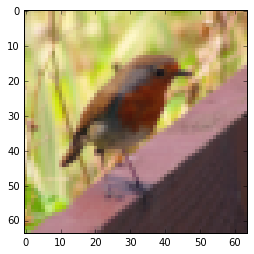

In [24]:
# Example of a picture
index = 10
plt.imshow(train_x_orig[index])
print ("y = " + str(train_y[0,index]) + ". It's a " + classes[train_y[0,index]].decode("utf-8") +  " picture.")

In [25]:
# Explore your dataset 
m_train = train_x_orig.shape[0]
num_px = train_x_orig.shape[1]
m_test = test_x_orig.shape[0]

print ("Number of training examples: " + str(m_train))
print ("Number of testing examples: " + str(m_test))
print ("Each image is of size: (" + str(num_px) + ", " + str(num_px) + ", 3)")
print ("train_x_orig shape: " + str(train_x_orig.shape))
print ("train_y shape: " + str(train_y.shape))
print ("test_x_orig shape: " + str(test_x_orig.shape))
print ("test_y shape: " + str(test_y.shape))

Number of training examples: 209
Number of testing examples: 50
Each image is of size: (64, 64, 3)
train_x_orig shape: (209, 64, 64, 3)
train_y shape: (1, 209)
test_x_orig shape: (50, 64, 64, 3)
test_y shape: (1, 50)


和之前一样，在训练模型之前，需要变更图像数据的维度，并进行标准化。下面的代码块会完成相应的工作。

<img src="img/imvectorkiank.png" style="width:450px;height:300px;">

<caption><center> <u>Figure 1</u>: Image to vector conversion. <br> </center></caption>

In [26]:
# Reshape the training and test examples 
train_x_flatten = train_x_orig.reshape(train_x_orig.shape[0], -1).T   # The "-1" makes reshape flatten the remaining dimensions
test_x_flatten = test_x_orig.reshape(test_x_orig.shape[0], -1).T

# Standardize data to have feature values between 0 and 1.
train_x = train_x_flatten/255.
test_x = test_x_flatten/255.

print ("train_x's shape: " + str(train_x.shape))
print ("test_x's shape: " + str(test_x.shape))


train_x's shape: (12288, 209)
test_x's shape: (12288, 50)


### 10.3 模型的结构



我们会构建两个不同的模型：
- 一个两层的神经网络
- 一个L层的神经网络

之后我们会比较两个模型的准确率，并测试不同的L值。

#### 10.3.1 两层神经网络

<img src="img/2layerNN_kiank.png" style="width:650px;height:400px;">
<caption><center> <u>Figure 2</u>: 2-layer neural network. <br> The model can be summarized as: ***INPUT -> LINEAR -> RELU -> LINEAR -> SIGMOID -> OUTPUT***. </center></caption>

<u>结构详解</u>:
- (64,64,3) 的图片输入会平展为一个 (12288,1) 的向量
- 对应的向量 $[x_0,x_1,...,x_{12287}]^T$ 会和权重矩阵相乘 $W^{[1]}$，权重矩阵的维度为 $(n^{[1]}, 12288)$
- 对上面的结果，加上截距项，并使用relu函数，获得对应的向量 $[a_0^{[1]}, a_1^{[1]},..., a_{n^{[1]}-1}^{[1]}]^T$.
- 重复同样的步骤
- 对结果向量乘以权重矩阵 $W^{[2]}$ 并加上截距
- 对最后的结果使用sigmoid函数。如果结果大于0.5，则将其分类为猫

#### 10.3.2 L层深度神经网络

It is hard to represent an L-layer deep neural network with the above representation. However, here is a simplified network representation:

<img src="img/LlayerNN_kiank.png" style="width:650px;height:400px;">
<caption><center> <u>Figure 3</u>: L-layer neural network. <br> The model can be summarized as: ***[LINEAR -> RELU] $\times$ (L-1) -> LINEAR -> SIGMOID***</center></caption>

<u>结构详解</u>:
- (64,64,3) 的图片输入会平展为一个 (12288,1) 的向量
- 对应的向量 $[x_0,x_1,...,x_{12287}]^T$ 会和权重矩阵相乘 $W^{[1]}$ 之后加上截距项 $b^{[1]}$。这步的计算结果成为线性神经元
- 接下来，对线性神经元使用relu函数。根据模型的结构，这一步可以对不同的 $(W^{[l]}, b^{[l]})$ 重复多次
- 最后，对最终的线性单元使用sigmoid函数。如果结果大于0.5，则将其分类为猫

#### 10.3.3 一般方法

深度学习构建模型的过程如下：
    1. 初始化参数 / 定义超参
    2. 根据迭代次数进行循环：
        a. 前向传播
        b. 计算成本函数
        c. 反向传播
        d. 更新参数 (使用原参数以及反向传播产生的梯度值) 
    4. 使用训练获得的参数来预测标签


### 10.4 两层神经网络

**练习**：使用之前实现好的辅助函数，来构建下面结构的两层神经网络模型 *LINEAR -> RELU -> LINEAR -> SIGMOID*。可能需要用到的函数包括：
```python
def initialize_parameters(n_x, n_h, n_y):
    ...
    return parameters 
def linear_activation_forward(A_prev, W, b, activation):
    ...
    return A, cache
def compute_cost(AL, Y):
    ...
    return cost
def linear_activation_backward(dA, cache, activation):
    ...
    return dA_prev, dW, db
def update_parameters(parameters, grads, learning_rate):
    ...
    return parameters
```

In [27]:
### CONSTANTS DEFINING THE MODEL ####
n_x = 12288     # num_px * num_px * 3
n_h = 7
n_y = 1
layers_dims = (n_x, n_h, n_y)

In [28]:
# GRADED FUNCTION: two_layer_model

def two_layer_model(X, Y, layers_dims, learning_rate = 0.0075, num_iterations = 3000, print_cost=False):
    """
    Implements a two-layer neural network: LINEAR->RELU->LINEAR->SIGMOID.
    
    Arguments:
    X -- input data, of shape (n_x, number of examples)
    Y -- true "label" vector (containing 0 if cat, 1 if non-cat), of shape (1, number of examples)
    layers_dims -- dimensions of the layers (n_x, n_h, n_y)
    num_iterations -- number of iterations of the optimization loop
    learning_rate -- learning rate of the gradient descent update rule
    print_cost -- If set to True, this will print the cost every 100 iterations 
    
    Returns:
    parameters -- a dictionary containing W1, W2, b1, and b2
    """
    
    np.random.seed(1)
    grads = {}
    costs = []                              # to keep track of the cost
    m = X.shape[1]                           # number of examples
    (n_x, n_h, n_y) = layers_dims
    
    # Initialize parameters dictionary, by calling one of the functions you'd previously implemented
    ### START CODE HERE ### (≈ 1 line of code)
    parameters = initialize_parameters(*layers_dims)
    ### END CODE HERE ###
    
    # Get W1, b1, W2 and b2 from the dictionary parameters.
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    
    # Loop (gradient descent)

    for i in range(0, num_iterations):

        # Forward propagation: LINEAR -> RELU -> LINEAR -> SIGMOID. Inputs: "X, W1, b1". Output: "A1, cache1, A2, cache2".
        ### START CODE HERE ### (≈ 2 lines of code)
        A1, cache1 = linear_activation_forward(X, W1, b1, 'relu')
        A2, cache2 = linear_activation_forward(A1, W2, b2, 'sigmoid')
        ### END CODE HERE ###
        
        # Compute cost
        ### START CODE HERE ### (≈ 1 line of code)
        cost = compute_cost(A2, Y)
        ### END CODE HERE ###
        
        # Initializing backward propagation
        dA2 = - (np.divide(Y, A2) - np.divide(1 - Y, 1 - A2))
        
        # Backward propagation. Inputs: "dA2, cache2, cache1". Outputs: "dA1, dW2, db2; also dA0 (not used), dW1, db1".
        ### START CODE HERE ### (≈ 2 lines of code)
        dA1, dW2, db2 = linear_activation_backward(dA2, cache2, 'sigmoid')
        dA0, dW1, db1 = linear_activation_backward(dA1, cache1, 'relu')
        ### END CODE HERE ###
        
        # Set grads['dWl'] to dW1, grads['db1'] to db1, grads['dW2'] to dW2, grads['db2'] to db2
        grads['dW1'] = dW1
        grads['db1'] = db1
        grads['dW2'] = dW2
        grads['db2'] = db2
        
        # Update parameters.
        ### START CODE HERE ### (approx. 1 line of code)
        parameters = update_parameters(parameters, grads, learning_rate)
        ### END CODE HERE ###

        # Retrieve W1, b1, W2, b2 from parameters
        W1 = parameters["W1"]
        b1 = parameters["b1"]
        W2 = parameters["W2"]
        b2 = parameters["b2"]
        
        # Print the cost every 100 training example
        if print_cost and i % 100 == 0:
            print("Cost after iteration {}: {}".format(i, np.squeeze(cost)))
        if print_cost and i % 100 == 0:
            costs.append(cost)
       
    # plot the cost

    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per tens)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
    
    return parameters

执行下面的代码块来训练模型的参数。看看随着模型的迭代，成本是否在下降。

Cost after iteration 0: 0.693049735659989
Cost after iteration 100: 0.6464320953428849
Cost after iteration 200: 0.6325140647912678
Cost after iteration 300: 0.6015024920354665
Cost after iteration 400: 0.5601966311605748
Cost after iteration 500: 0.515830477276473
Cost after iteration 600: 0.4754901313943325
Cost after iteration 700: 0.43391631512257495
Cost after iteration 800: 0.40079775362038866
Cost after iteration 900: 0.35807050113237976
Cost after iteration 1000: 0.33942815383664127
Cost after iteration 1100: 0.3052753636196265
Cost after iteration 1200: 0.2749137728213018
Cost after iteration 1300: 0.24681768210614846
Cost after iteration 1400: 0.1985073503746611
Cost after iteration 1500: 0.17448318112556602
Cost after iteration 1600: 0.17080762978096134
Cost after iteration 1700: 0.11306524562164742
Cost after iteration 1800: 0.0962942684593716
Cost after iteration 1900: 0.08342617959726865
Cost after iteration 2000: 0.07439078704319087
Cost after iteration 2100: 0.066307481

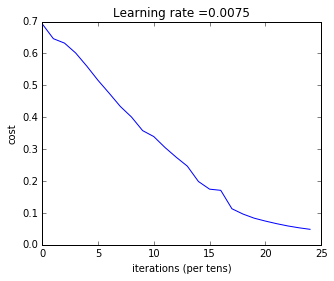

In [29]:
parameters = two_layer_model(train_x, train_y, layers_dims = (n_x, n_h, n_y), num_iterations = 2500, print_cost=True)

**预期执行结果**:
<table> 
    <tr>
        <td> **Cost after iteration 0**</td>
        <td> 0.6930497356599888 </td>
    </tr>
    <tr>
        <td> **Cost after iteration 100**</td>
        <td> 0.6464320953428849 </td>
    </tr>
    <tr>
        <td> **...**</td>
        <td> ... </td>
    </tr>
    <tr>
        <td> **Cost after iteration 2400**</td>
        <td> 0.048554785628770206 </td>
    </tr>
</table>

模型完成训练后，就可以用训练好的参数对数据集进行分类。执行下面的代码块，查看分类结果。

In [30]:
predictions_train = predict(train_x, train_y, parameters)

Accuracy: 1.0


**预期输出**:
<table> 
    <tr>
        <td> **Accuracy**</td>
        <td> 1.0 </td>
    </tr>
</table>

In [31]:
predictions_test = predict(test_x, test_y, parameters)

Accuracy: 0.72


**预期输出**:

<table> 
    <tr>
        <td> **Accuracy**</td>
        <td> 0.72 </td>
    </tr>
</table>

**注意**：如果调整参数重新跑，你可能会发现，模型在较少的迭代次数（比如1500次）时给出了对测试集更好的准确率。这被称为“早停法early stop”，在之后的课程里我们会讲。“early stop”是一种防止过拟合的办法。

相比于逻辑回归（70%），两层神经网络的表现更好（72%）。接下来我们看看 $L$ 层神经网络的表现。